### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. Describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [127]:
%matplotlib inline 
import warnings
import matplotlib
from math import floor
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm, geom
import statistics
import warnings
warnings.filterwarnings('ignore')

In [128]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [129]:
# Imports 
from sklearn.datasets import load_boston

# Load Data
boston = load_boston()

# Create a dataframe
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['target'] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


1.Describe the dataset:

In [130]:
#How many samples does it contain? 
print(f'Number of samples: {df.shape[0]}')
#How many features? 
print(f'Number of features: {df.shape[1]}')
#What is the data type for each variable?

print(df.info())

Number of samples: 506
Number of features: 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


The Boston dataset is about house prices and information. we'll use the 'DESCR' function to describe general information about it.

In [131]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [132]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


2.Produce a histogram and a boxplot of the nitric oxides concentration. 
describe the distribution.

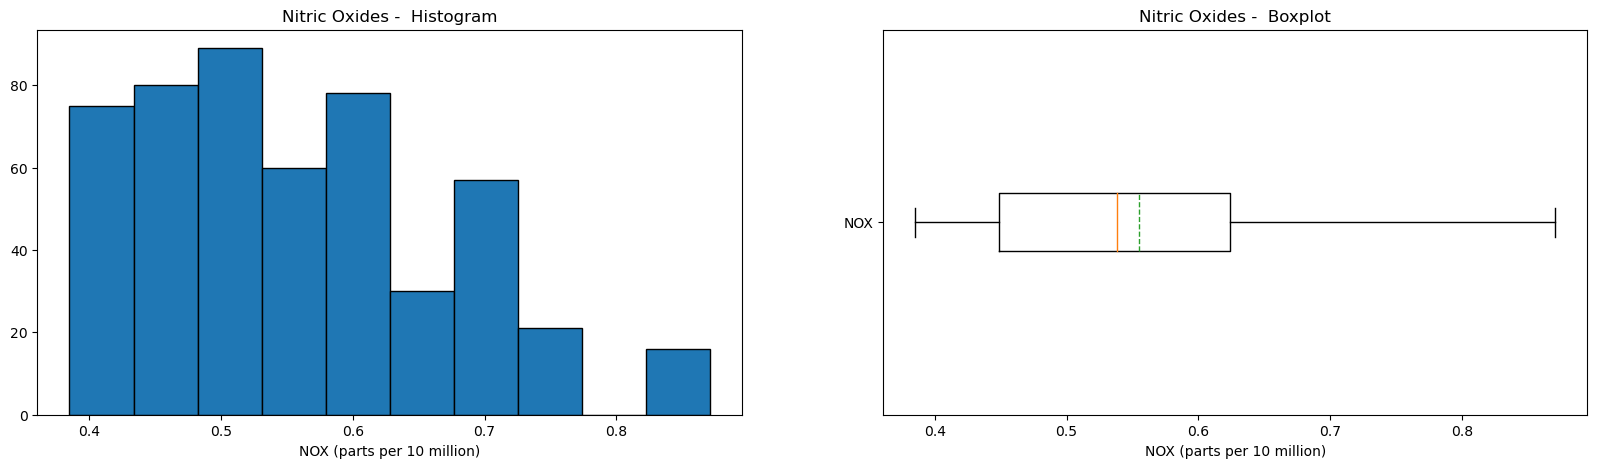

In [166]:
# Here we produce a histogram and a box plot of the nitric oxides concentration.
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax.hist(df["NOX"], bins=10, edgecolor='black')
ax.set_xlabel("NOX (parts per 10 million)")
ax.set_title("Nitric Oxides -  Histogram")
ax2.boxplot(df["NOX"], labels=["NOX"], vert=False, showmeans=True, showcaps=True, meanline = True)
ax2.set_xlabel("NOX (parts per 10 million)")
ax2.set_title("Nitric Oxides -  Boxplot")
plt.show()

As we saw in the recitation, the boxplot can help us determine the distribution of the data. <br>
Using the boxplot we cas say that the distribution is right skewed with a long tail to the right and, as such, with a median larger than the mean.<br>
It resembles a log-normal distribution based only on the shape of the plot.

3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?

<AxesSubplot:>

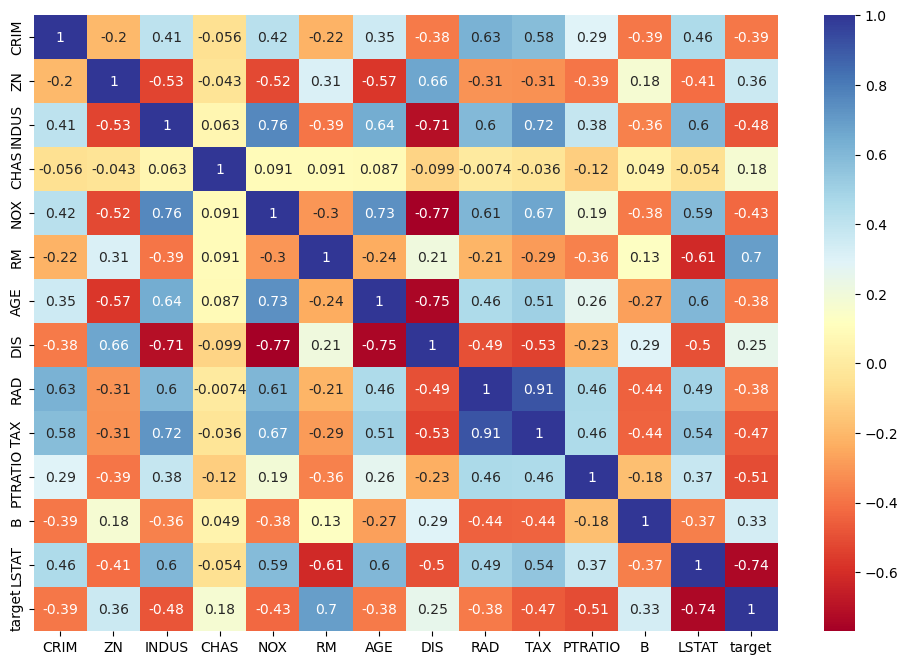

In [134]:
#heatmap helps use understand the correlation
sns.heatmap(df.corr(),cmap='RdYlBu', annot=True)

<AxesSubplot:>

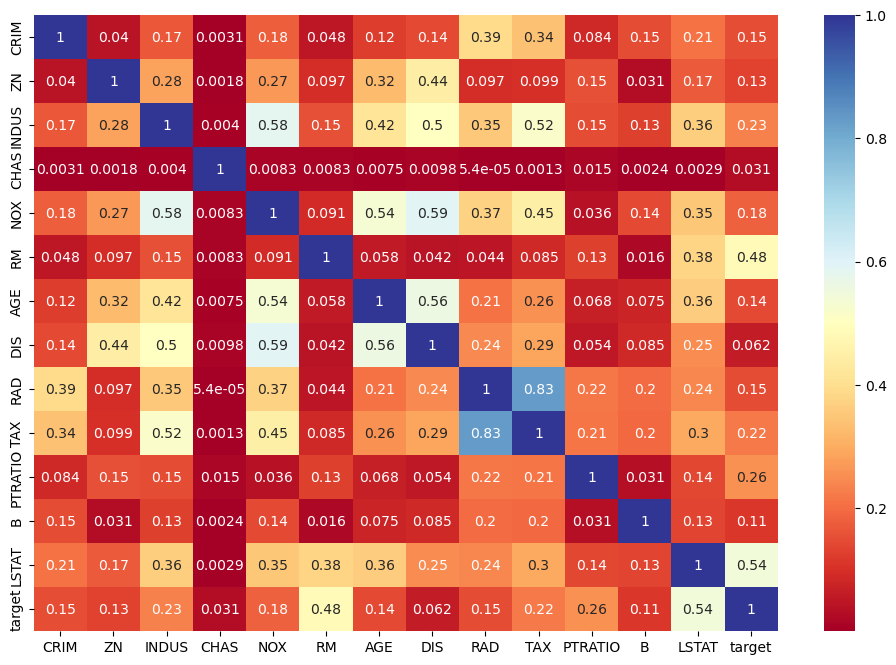

In [135]:
#if we want the correlation between 0-1:
sns.heatmap(df.corr()**2,cmap='RdYlBu', annot=True)

In [136]:
# Top 15 correlations 

corr_lower_triangle =df.corr()**2
corr_lower_triangle[:] = np.tril(corr_lower_triangle, k=-1)
c = corr_lower_triangle.abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
print(so.head(15))

RAD    TAX       0.828515
NOX    DIS       0.591715
INDUS  NOX       0.583164
AGE    DIS       0.559325
LSTAT  target    0.544146
NOX    AGE       0.535049
INDUS  TAX       0.519495
       DIS       0.501302
RM     target    0.483525
NOX    TAX       0.446255
ZN     DIS       0.441438
INDUS  AGE       0.415739
CRIM   RAD       0.391257
RM     LSTAT     0.376761
NOX    RAD       0.373860
dtype: float64


From correlation matrix, we see the there is hight correlataion between: 
* RAD and TAX.
* NOX and DIS.
* INDUS and NOX.
* AGE and DIS.
* NOX and AGE.
* INDUS and TAX.


4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 

First pair we chose was NOX and TAX which we saw had the highest correlation:

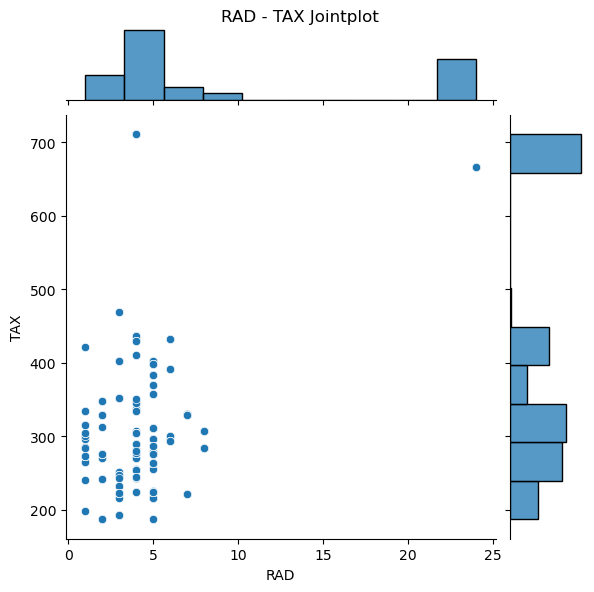

In [137]:
p = sns.jointplot(x= "RAD", y ="TAX", data=df, marginal_kws=dict(bins=10, fill=True))
p.fig.suptitle("RAD - TAX Jointplot")
p.fig.subplots_adjust(top=0.95)

Second pair we chose was NOX and DIS which we saw had the second highest correlation:

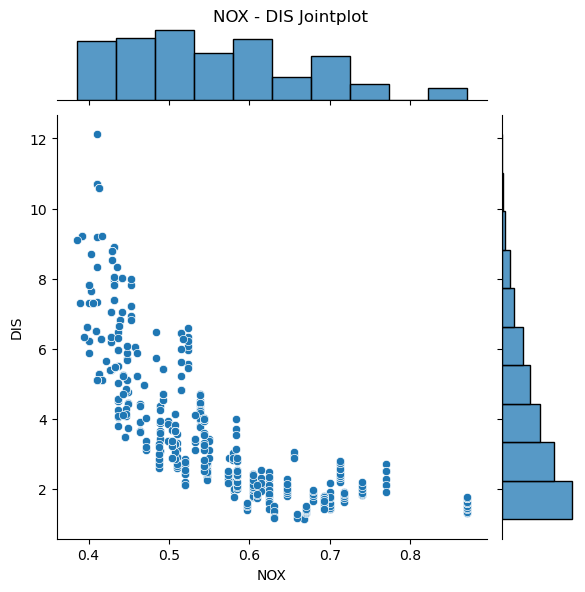

In [138]:
p = sns.jointplot(x= "NOX", y ="DIS", data=df, marginal_kws=dict(bins=10, fill=True))
p.fig.suptitle("NOX - DIS Jointplot")
p.fig.subplots_adjust(top=0.95)

5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)

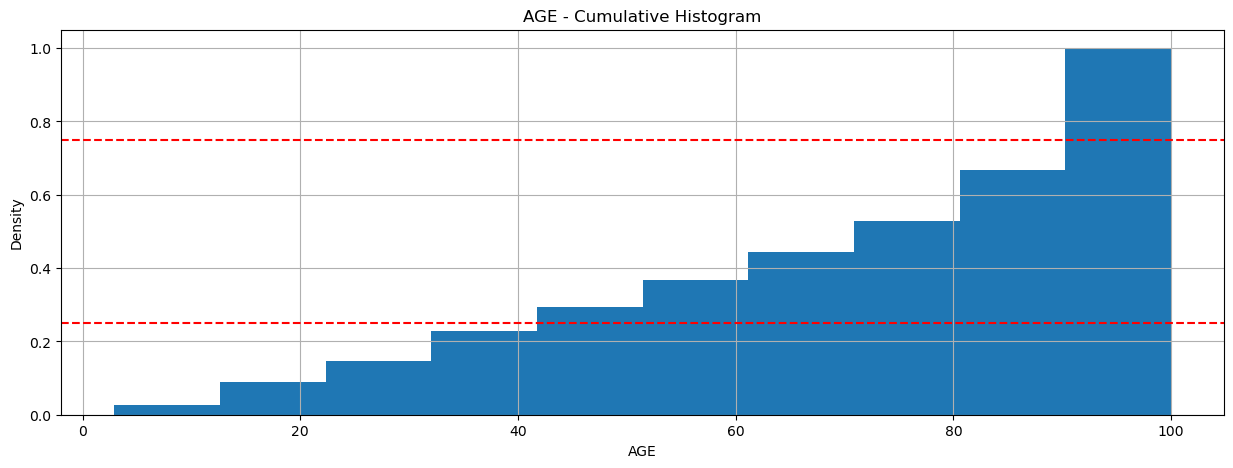

In [139]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 1, 1)

df["AGE"].hist(density = True ,cumulative = True, bins=10)
plt.axhline(0.25, color='r', linestyle='--')
plt.axhline(0.75, color='r', linestyle='--')
ax.set_xlabel("AGE")
ax.set_ylabel("Density")
ax.set_title("AGE - Cumulative Histogram");

6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

First intresting trend we see in the NOX - DIS correlation<br>

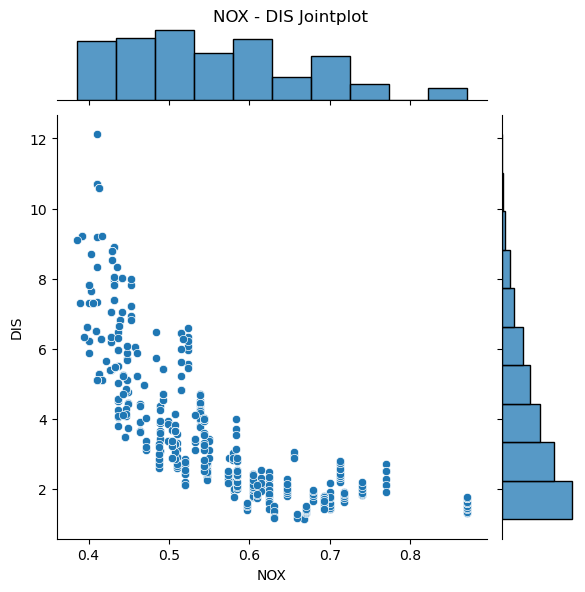

In [140]:
p = sns.jointplot(x= "NOX", y ="DIS", data=df, marginal_kws=dict(bins=10, fill=True))
p.fig.suptitle("NOX - DIS Jointplot")
p.fig.subplots_adjust(top=0.95)

We can see that there's a negative correlation between DIS and NOX. This makes sense since the closer you are to the employment centers the more industrial entities that emit and pollute Nitric Oxide Gas.


Second intresting trend we see in the RM - LSTAT correlation:

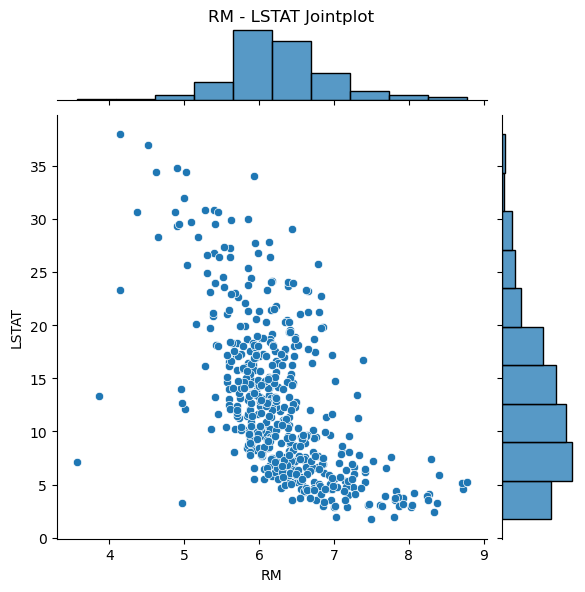

In [141]:
p = sns.jointplot(x= "RM", y ="LSTAT", data=df, marginal_kws=dict(bins=10, fill=True))
p.fig.suptitle("RM - LSTAT Jointplot")
p.fig.subplots_adjust(top=0.95)

We can see that there's a negative correlation between RM and LSTAT. This makes sense since the higher percentage of population with lower status the smaller the dwelling tends to be, i.e. smaller number of rooms per dwelling.

### Question 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k=4$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

***Solution 2.A:***<br><br>
Since there is no any information about the distributions -> we can conclude that their joint distribution is defiened as following:
$$P(x,y,z)=P(x,y\mid z)P(z)$$
The number of parameters that define the joint distribution is $$4n*m-1$$

The steps of the calculation:

1. For $P(x,y\mid z)$ each of z parameter requires n*m-1 paramters, which contribute in total: $4*(n*m-1)$

2. For $P(z)$ - requires 3 paramters to define z distribution

3. In total:  $$4*(n*m-1)+3=4n*m-1$$

#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

***Solution 2.B:***<br><br>
If $\ X, Y \ $ and $Z$ are independent -> we can conclude that their joint distribution is defiened as following: 
$$P(x,y,z)=P(x)P(y)P(z)$$

The number of parameters that define the joint distribution is $$n+m+1$$

The steps of the calculation:

1. For $P(x)$ - there are n-1 paramters that define x distribution

2. For $P(y)$ - there are m-1 paramters that define y distribution

3. For $P(z)$ - requires 3 paramters to define z distribution (4-1=3)

4. In total: $$n-1+m-1+3$$

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

***Solution 2.C:***<br><br>
If $X$ and $Y$ are conditionaly independent given $Z$ -> $x\perp y\mid z$, we can conclude that their joint distribution is defiend as following: $$P(x,y,z)=P(x\mid z)P(y\mid z)P(z)$$

The number of parameters that define the joint distribution is $$4n+4m-5$$

The steps of the calculation:

1. For $P(x\mid z)$ each of z parameter there are n-1 paramters, which contribute in total:$4*(n-1)$

2. For $P(y\mid z)$ each of z parameter there are m-1 paramters, which contribute in total:$4*(m-1)$

3. For $P(z)$ - requires 3 paramters to define z distribution (4-1=3)

4. In total: $$4*(n-1)+4*(m-1)+3$$

#### 2.D
Give an example for a joint distribution of $\ U, V \ $ and $W$ where $U$ and $V$ are NOT conditionally independent given $W$, but $U$ and $V$ are (unconditionally) independent. Also: $U$ and $V$ are standard normally distributed ($N(0, 1)$) and $W$ is a coin (2 possible values).

***Solution 2.D:***<br><br>
$U$  and $V $are independent, with normal distributions ($N(0, 1)$)


Let $U+V=W$, then $W\sim N(0,2)$


IF $U$ and $V$ were conditionally independent given $W$, the following equation should be hold:

$P(U\mid V,W)=P(U\mid W)$


Let $W=2$ and $V=1$ then $U=1$.

$P(U\mid V,W)=P(U=1\mid V=1,W=2)=100\%$

Whereas, $P(U=1\mid W=2)\approx84\%$

$84\%\neq100\%. $

Thus $U$ and $V$ are not conditionally independent given $W$.


### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3$. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.


In [142]:
df_GMD = pd.read_csv('GMD.csv', sep=',',header=None,names=['samples'],usecols=range(1,2))

In [143]:
df_GMD

,samples
0,3.575253
1,4.105491
2,3.903642
3,4.472249
4,4.297265
...,...
795,16.596823
796,16.314496
797,14.690099
798,12.942772


<AxesSubplot:ylabel='Count'>

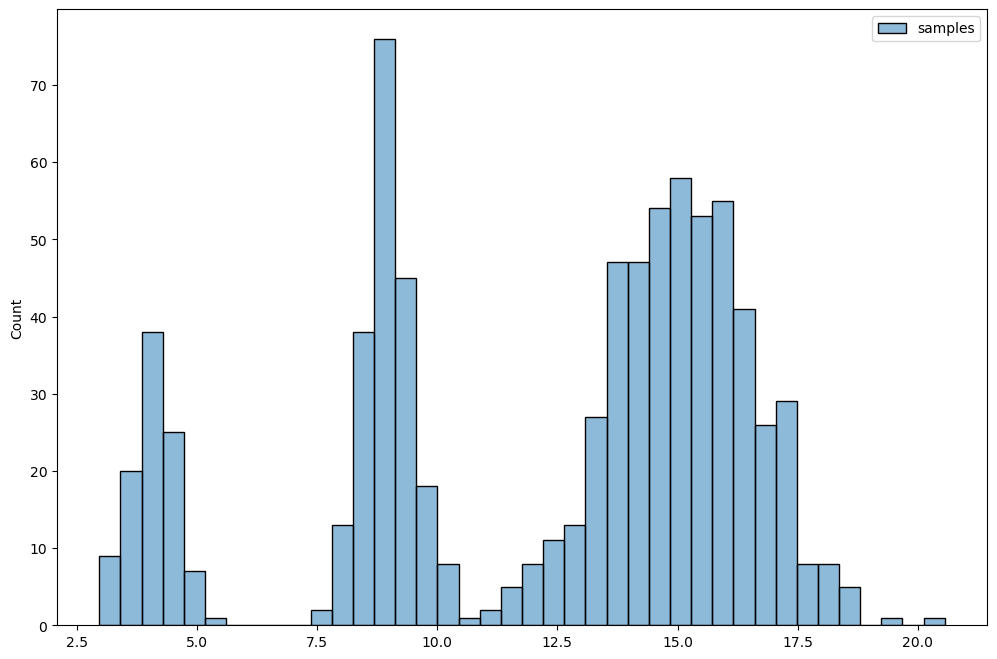

In [144]:
sns.histplot(df_GMD, bins=40)

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

**Answer 3.A:** <br/>
The first option is to use the expected value and variance equations to find the parameters: 
<br/><br/>$$E(X)=\sum_{i}w_{i}E(X_{i})$$

$$Var(X)=\sum_{i}w_{i}E((X_{i}-\mu_{i})^{2})+\sum_{i}w_{i}(\mu_{i}-\mu)^{2}$$

We can calculate the expected value and the variance of the GMM from the data in the CSV file.

In [146]:
E=round(df_GMD['samples'].mean(),2)
V = round(statistics.variance(df_GMD['samples']),2)
print(f'The Expected value of GMD is:{E}')
print(f'The Variance of GMD is:{V}')

The Expected value of GMD is:12.2
The Variance of GMD is:17.59


We know that:<br> 
$E(X)=\sum_{i}w_{i}E(X_{i})=w_{1}E(X_{1})+w_{2}E(X_{2})+w_{3}E(X_{3})$<br>

$Var(X)=\sum_{i}w_{i}E((X_{i}-\mu_{i})^{2})+\sum_{i}w_{i}(\mu_{i}-\mu)^{2}=(w_{1}E((X_{1}-\mu_{1})^{2})+w_{2}E((X_{2}-\mu_{2})^{2})+w_{3}E((X_{3}-\mu_{3})^{2}))+(w_{1}(\mu_{1}-\mu)^{2}+w_{2}(\mu_{2}-\mu)^{2}+w_{3}(\mu_{3}-\mu)^{2})$

Meaning:<br> 
$12.2=4w_{1}+9*0.25+\mu_{3}w_{3}$

$17.59=(0.5^{2}w_{1}+0.5^{2}*0.25+1.5^{2}w_{3})+(w_{1}(4-12.2)^{2}+0.25(9-12.2)^{2}+w_{3}(\mu_{3}-12.2)^{2})$

We also know that:<br> 
$w_{1}+w_{2}+w_{3}=1$ <br> 
so we can say that $w_{2}=0.25,w_{1}=0.75-w_{3}$

After solving this equations, the result are:

$w_{1}=0.13$

$w_{3}=0.62$

$\mu_{3}=15.15$

The second option is to use EM to estimate the parameters:

In [147]:
# We don't change the given fixed parameters when we run the EM. 
dist1 = norm(4, 0.5)
dist2 = norm(9, 0.5)
dist3 = norm(13, 1.5)

distributions = {"dist1": [dist1, 0.15, 4, 0.5], "dist2": [dist2, 0.25, 9, 0.5], "dist3": [dist3, 0.6, 13, 1.5]}
gmm_data=pd.read_csv('GMD.csv', sep=',',header=None, names=["sample"], usecols=range(1,2))

 # we could also have done it with some threshold as a stoping condition.
for i in range(5): 
    for key, dist in distributions.items():
        gmm_data[key] = gmm_data["sample"].apply(lambda x: dist[1]*dist[0].pdf(x))
    
    sample_prob = gmm_data.iloc[:,1:].sum(axis=1)
    
    for key in distributions.keys():
         gmm_data[key]=gmm_data[key]/sample_prob

    distributions["dist1"][1] = gmm_data["dist1"].sum()/len(gmm_data)
    distributions["dist3"][1] = 0.75 - distributions["dist1"][1]
    distributions["dist3"][2] = np.dot(gmm_data["sample"],gmm_data['dist3'] ) / (distributions["dist3"][1]*len(gmm_data))
    distributions["dist3"][0] = norm(distributions["dist3"][2],
                                     distributions["dist3"][3])

print(f' w1 = {distributions["dist1"][1].round(3)}')
print(f' w3 = {distributions["dist3"][1].round(3)}')
print(f' \u03BC3 = {distributions["dist3"][2].round(3)}')


 w1 = 0.125
 w3 = 0.625
 μ3 = 15.105


#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

We used Freedman-Diaconis rule in order to calculate the optimal number of bins.

We set the minimum and maximum values of X axis to be 3 standard deviations from the mean of the leftmost distribution and of the rightmost distribution respectively.

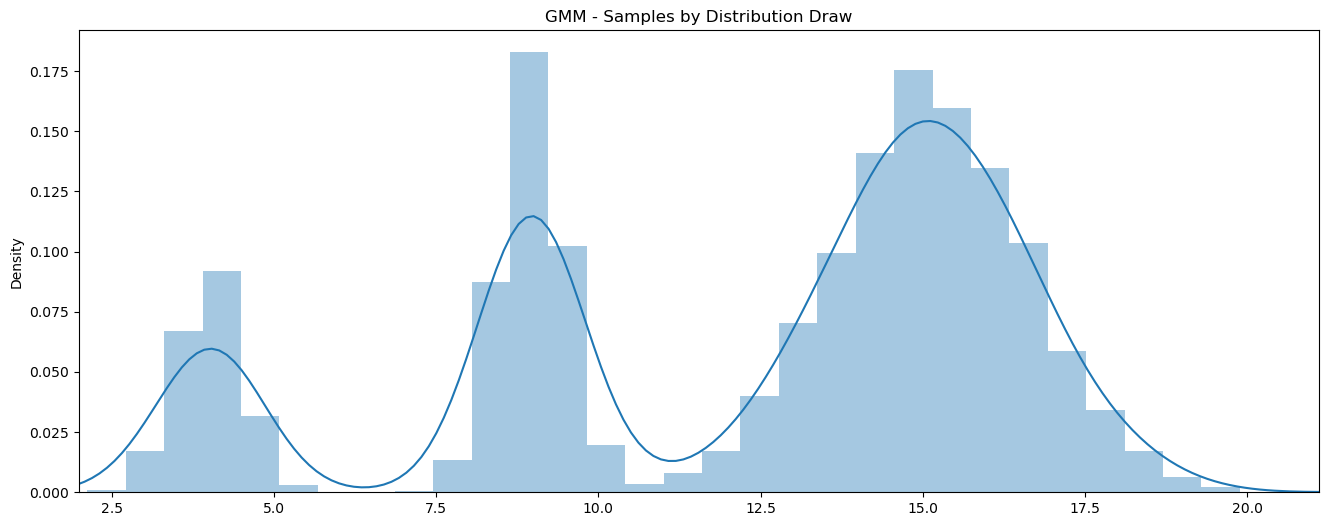

In [148]:
norm_params = np.array([[distributions["dist1"][2], distributions["dist1"][3]],[distributions["dist2"][2], distributions["dist2"][3]], [distributions["dist3"][2], distributions["dist3"][3]]])
weights = np.array([distributions["dist1"][1],distributions["dist2"][1],distributions["dist3"][1]])
dist_choices = np.random.choice(len(weights), size=10000, replace=True, p = weights)
samples = np.vectorize(lambda x: norm.rvs(loc=norm_params[x][0], scale=norm_params[x][1]))(dist_choices)
fig, ax = plt.subplots(1,1, figsize=(16,6))
ax.set_title('GMM - Samples by Distribution Draw')
bin_width= 2*(np.quantile(samples,0.75)-np.quantile(samples,0.25))/np.cbrt(len(samples))
bins_number = int(np.ceil((samples.max()-samples.min()) / bin_width))
ax.set_xlim(samples.min(), samples.max())
ax.set_xlim([distributions["dist1"][2]-distributions["dist1"][3]*4, distributions["dist3"][2]+distributions["dist3"][3]*4])
sns.distplot(samples, bins=bins_number);

#### 3.C
Now assume that the data comes from a Gaussian mixture distribution (GMD) with $k=4$.

The given data and parameters stay the same.

Can you estimate the unknown parameters in the two ways described in section A? Explain.

In [149]:
Em gmm with 4 gousians
but we don't know anything about them, weights, mean and s.deviation  


SyntaxError: invalid syntax (161052444.py, line 1)

#### 3.D
Describe two ways for generating data for a GMM random variable with:
* centers at  $\mu_1=3, \mu_2=7, \mu_3=10$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

**Answer 3.D:** <br/>
We can generate GMM data in two ways:


1. As their weights are equal, we can sample equal number of samples from each individual distribution and then concatenating them together.  
2. We draw a distribution, Based on their weights, and from that distribution   obtain a sample, we repeat doing that for N samples.

#### 3.E
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


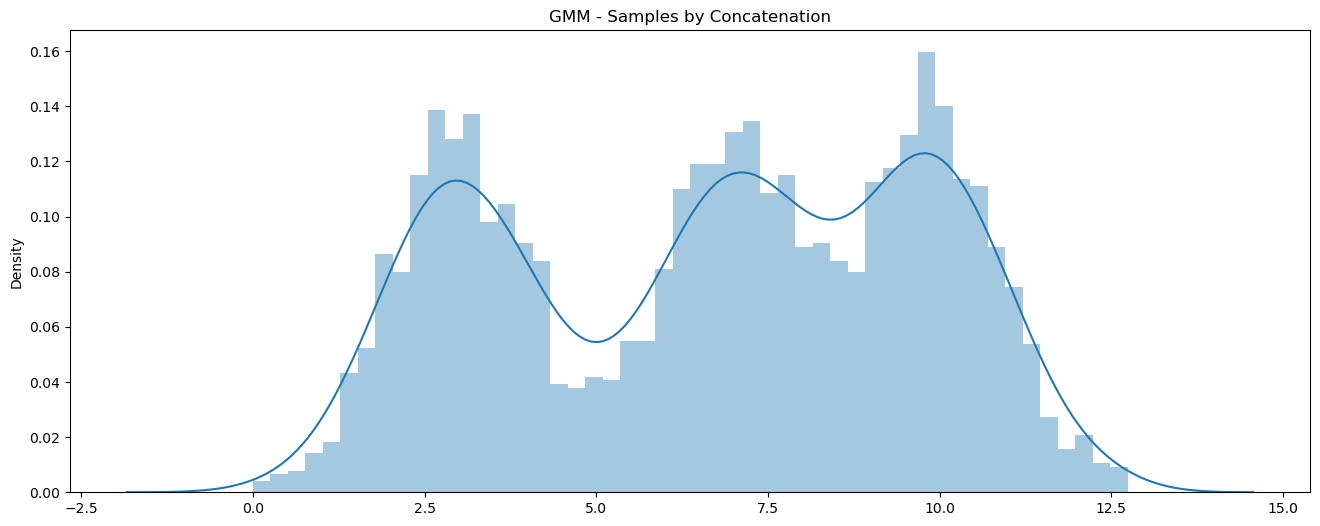

In [150]:
fig, ax = plt.subplots(1,1, figsize=(16,6))
x1 = norm.rvs(loc=3, scale=1, size= 1000)
x2 = norm.rvs(loc=7, scale=1, size= 1000)
x3 = norm.rvs(loc=10, scale=1, size= 1000)
gmm_samples = np.concatenate([x1, x2, x3])
ax.set_title('GMM - Samples by Concatenation')
sns.distplot(gmm_samples, bins=50);

#### 3.F
Use the other one to generate 1000 more points and draw two comparative histograms.

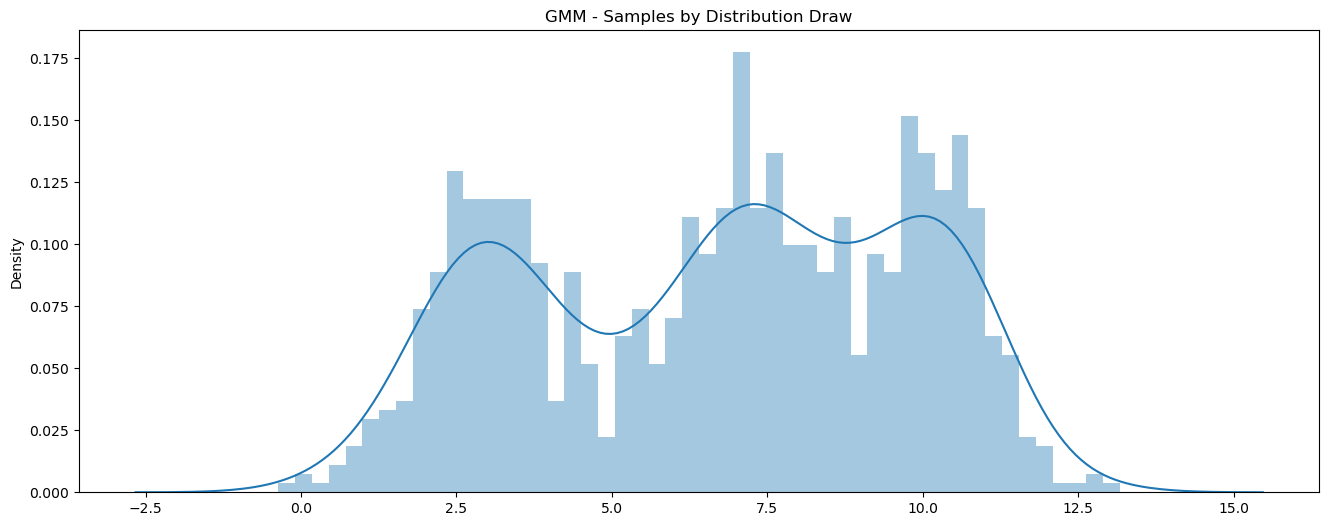

In [151]:
norm_params = np.array([[3, 1], [7, 1], [10, 1]])
weights = np.array([1/3,1/3,1/3])
dist_choices = np.random.choice(len(weights), size=1000, replace=True, p = weights)
samples = np.vectorize(lambda x: norm.rvs(loc=norm_params[x][0], scale=norm_params[x][1]))(dist_choices)
fig, ax = plt.subplots(1,1, figsize=(16,6))
ax.set_title('GMM - Samples by Distribution Draw')
sns.distplot(samples, bins=50);

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 75,000 RCU and a standard deviation of 37,500 RCU.

$X\sim$N($\mu=75,000,\sigma^{2}=37,500^{2})$

#### 4.A
What percent of people earn less than 50,000 RCU?

$P(X<50,000)=?$
We need to transform X into to standart normal:<br><br>

In [152]:
x = norm(75000, 37500)
print(f'The percent of people earn less than 50,000 RCU is {round(x.cdf(50000),4)*100}%')

The percent of people earn less than 50,000 RCU is 25.25%


#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [153]:
print(f'The percent of people earn between 45,000 RCU and 65,000 RCU is {round(x.cdf(65000)-x.cdf(45000),4)*100}%')

The percent of people earn between 45,000 RCU and 65,000 RCU is 18.3%


#### 4.C
What percent of people earn more than 85,000 RCU?

In [154]:
print(f'The percent of people earn more than 85,000 RCU is {round(1-x.cdf(85000),3)*100}%')

The percent of people earn more than 85,000 RCU is 39.5%


#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [155]:
print(f'Out of the company 1000 employees, we expect that at least {floor(1000*(1-x.cdf(140000)))} employees earn more than 140,000 RCU')

Out of the company 1000 employees, we expect that at least 41 employees earn more than 140,000 RCU


### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

In [156]:
## T is an harmonic series with len of n.
## Each Xi in the series is distributed geometricly hence E(Xi) is i/p (expected value of geomtric distribution).
## We can take the n out and multiply it by the sum of the harmonic series of 1 / Xi

def expected_wait(n) : 
    Harmonic_S = []
    for i in range(1, n + 1): 
        Harmonic_S.append(float(1 / i))
    return f'With {n} different equiprobable coupon types, The Expected time of waiting is: {round(n*sum(Harmonic_S), 3)}'

## Example:
print(expected_wait(100))

With 100 different equiprobable coupon types, The Expected time of waiting is: 518.738


#### 5.B
Write code to compute the exact value of $V(T_{N})$

In [157]:
## T is an harmonic series with len of n.
## Each Xi in the series is distributed geometricly hence VAR(Xi) is (i-p)/p**2 (variance of geomtric distribution).
## We add all of the var(Xi) to a list and then we sum it to get the variqnce of Tn.

def var_wait(n) : 
    Harmonic_S = []
    for i in range(1, n + 1): 
        Harmonic_S.append(float((1-((n-i+1)/n)) / (((n-i+1)/n))**2))
    res =  round(sum(Harmonic_S),3)
    return f'With {n} different equiprobable coupon types, The Variance of the waiting time is: {res}' 

print(var_wait(5))

With 5 different equiprobable coupon types, The Variance of the waiting time is: 25.174


#### 5.C
Write code to exactly compute $P(T_{30}>60)$

In [164]:
# if p has only one value than the funcion returns the pmf of a geometric distribution with the probability of that value in tries_range
# if p has more then 1 element then the functions defines

def single_coupon(n) : 
    Harmonic_S = []
    for i in range(1, n + 1) : 
        Harmonic_S.append(float(1/i))
    return [round(1/(i*n),3) for i in Harmonic_S]


def conv_rec(p, tries_range):
    if len(p) == 1:
        return geom.pmf(tries_range, p[0])
    p_i = geom.pmf(tries_range, p[0])
    return np.convolve(p_i, conv_rec(p[1:], tries_range))


def coupon_collector_p_larger_than(successes, tries):
    p = single_coupon(successes)
    tries_range = np.arange(tries) + 1
    p_collector = conv_rec(p, tries_range)
    res =  round(1 - p_collector[:tries - successes + 1].sum(), 3)
    return f'P(T{successes})>{tries} = {res}'


print(coupon_collector_p_larger_than(30,60))

P(T30)>60 = 0.994


#### 5.D
Let $S_N$ denote the waiting time until $N/2$ different coupons are collected.

Write code to exactly compute $P(S_{30}>60)$

In [165]:
def P_of_S(s, t):
    div = int(s/2)
    freq = list([((s-i+1) / s) for i in range(1, div + 1)])
    x = np.arange(t) + 1
    convol = x0 = stats.expon.pdf(x, scale = 1/freq[0])
    for p in freq[1:]:
        xi = stats.expon.pdf(x,scale = 1/p)
        convol = np.convolve(convol, xi)
    return f'P(S{s} > {t}) = {round((1 - convol[:t+1 - div].sum()), 3)}'

print(P_of_S(30,60))

P(S30 > 60) = 0.998
